# Lab 3.01 - The Central Limit Theorem

Import all necessary Python libraries.

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt    

## Probability theory

### Exercise 1 - Probabilities for normal distributions

Calculate the given probabilities in the standard normal distribution $Z \sim Nor(\mu=0, \sigma=1)$. Compare your solutions with the given answers.

|     | Calculate:             | Answer: |
| :-- | :--------------------- | :------ |
| 1.  | $P(Z < 1.33)$          | 0.908   |
| 2.  | $P(Z > 1.33)$          | 0.092   |
| 3.  | $P(Z < −1.33)$         | 0.092   |
| 4.  | $P(Z > −1.33)$         | 0.908   |
| 5.  | $P(Z < 0.45)$          | 0.674   |
| 6.  | $P(Z > −1.05)$         | 0.853   |
| 7.  | $P(Z < 0.65)$          | 0.742   |
| 8.  | $P(−0.45 < Z < 1.20)$  | 0.559   |
| 9.  | $P(−1.35 < Z < −0.10)$ | 0.372   |
| 10. | $P(−2.10 < Z < −0.90)$ | 0.166   |

In [2]:
m = 0 #gemiddelde
s = 1 #standaard afwijking


print('P(Z<1.33)=%.3f'%stats.norm.cdf(1.33, loc=m, scale=s))
print('P(Z>1.33)=%.3f'% stats.norm.sf(1.33, loc=m,scale=s))
print('P(Z<-1.33)=%.3f'% stats.norm.cdf(-1.33, loc=m,scale=s))
print('P(Z>-1.33)=%.3f'% stats.norm.sf(-1.33, loc=m,scale=s))
print('P(Z<0.45)=%.3f'% stats.norm.cdf(0.45, loc=m,scale=s))
print('P(Z>-1.05)=%.3f'% stats.norm.sf(-1.05, loc=m,scale=s))
print('P(Z<0.65)=%.3f'% stats.norm.cdf(0.65, loc=m,scale=s))
print('P(-0.45<Z<1.20)=%.3f'% (stats.norm.cdf(1.20, loc=m,scale=s)-stats.norm.cdf(-0.45, loc=m,scale=s)))
print('P(-1.35<Z<-0.10)=%.3f'% (stats.norm.cdf(-0.10, loc=m,scale=s)-stats.norm.cdf(-1.35, loc=m,scale=s)))
print('P(-2.10<Z<-0.90)=%.3f'% (stats.norm.cdf(-0.90, loc=m,scale=s)-stats.norm.cdf(-2.10, loc=m,scale=s)))


P(Z<1.33)=0.908
P(Z>1.33)=0.092
P(Z<-1.33)=0.092
P(Z>-1.33)=0.908
P(Z<0.45)=0.674
P(Z>-1.05)=0.853
P(Z<0.65)=0.742
P(-0.45<Z<1.20)=0.559
P(-1.35<Z<-0.10)=0.372
P(-2.10<Z<-0.90)=0.166


### Exercise 2 - Plot probability density
Make a graphical plot of the probability density function and the cumulative distribution function of a normal distribution with $\mu = 2.5$ and $\sigma = 1.5$.

What is the area under the density function between  x=0.5  and  x=4 . (Answer = 0.750)

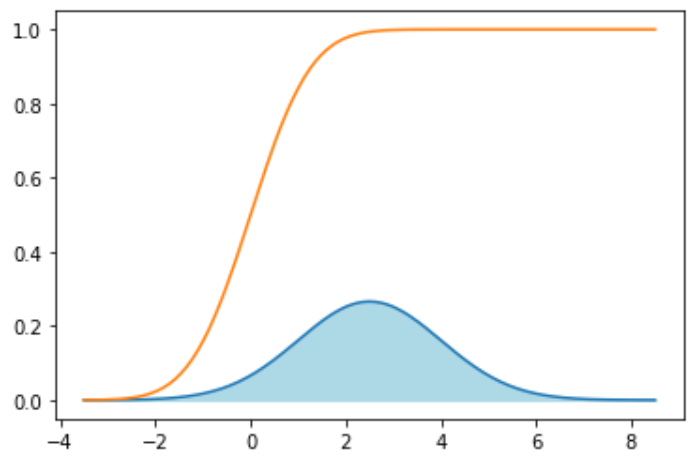

0.750133526342675

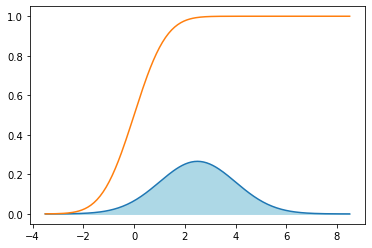

In [13]:
m=2.5
s= 1.5
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
dist_y = stats.norm.pdf(dist_x, m, s)
plt.plot(dist_x, dist_y)
plt.fill_between(dist_x, 0, dist_y, color='lightblue')

dist_y_cdf = stats.norm.cdf(dist_x)
plt.plot(dist_x, dist_y_cdf)
stats.norm.cdf(4, loc=m,scale=s)-stats.norm.cdf(0.5, loc=m,scale=s)

### Exercise 3 - Student t vs normal distribution
Make a graphical plot of the probability density function and the cumulative distribution function for the Student's t-distribution with 3 degrees of freedom.  
Also make a graphical plot of the standard normal distribution, so you can compare both.

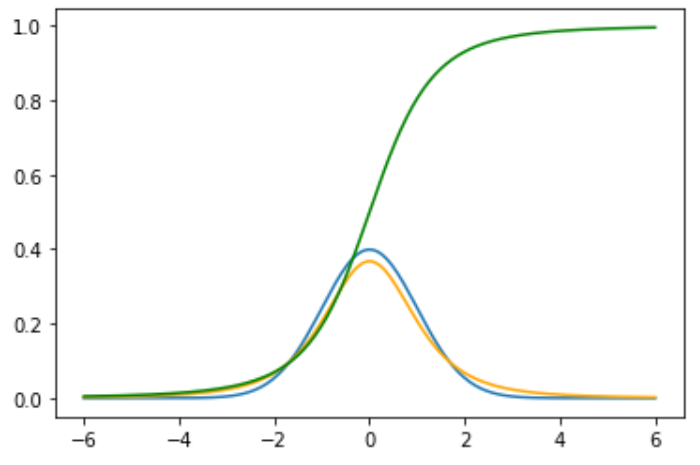

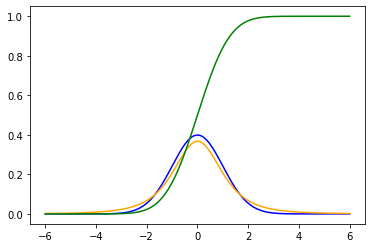

In [39]:
dist_x = np.linspace(-6,6, num=201)
#y waarden om gauss curve te tekene
dist_y = stats.norm.pdf(dist_x)
dist_y_cdf = stats.norm.cdf(dist_x)

dist_t_y = stats.t.pdf(dist_x, 3)
dist_t_y_cdf = stats.t.cdf(dist_y, 3)

#plot gauss curve µ
plt.plot(dist_x,dist_y, color="blue")
plt.plot(dist_x, dist_t_y, color="Orange")


dist_y_cdf = stats.norm.cdf(dist_x)
plt.plot(dist_x, dist_y_cdf, color="green")


### Exercise 4 - Theoretical vs real probability density
Generate 25 random numbers distributed according to the standard normal distribution. Plot a histogram with probability density function and the theoretical probability density.  
Do the same for 250 and 2500 numbers.   
Notice how the real probability density approaches the theoretical one as the sample size increases.

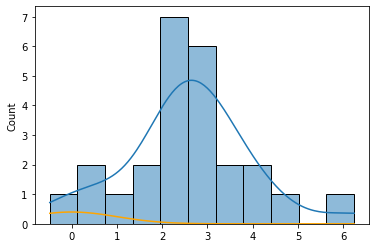

In [34]:
n=25
observations = np.random.normal(loc=m, scale=s, size=n)
sns.histplot(observations, kde=True)


<AxesSubplot:ylabel='Count'>

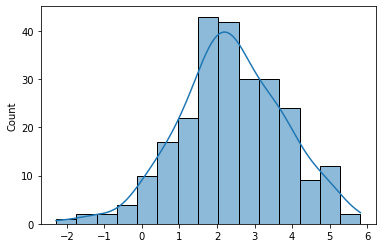

In [40]:
n=250
observations = np.random.normal(loc=m, scale=s, size=n)
sns.histplot(observations, kde=True)


<AxesSubplot:ylabel='Count'>

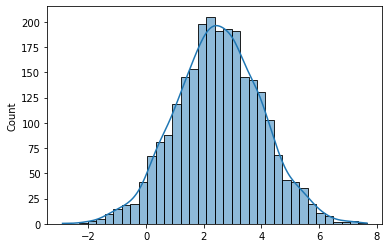

In [41]:
n=2500
observations = np.random.normal(loc=m, scale=s, size=n)
sns.histplot(observations, kde=True)


### Exercise 5 - Cholesterol 
A health survey between 1988 and 1994 indicated that the mean cholesterol value for women between the age of 20 and 29 was 183 mg/dl, with a standard deviation equal to 36. We now take a random sample of 81 women.

1. Plot the probability distribution of the sample mean $\overline{x}$.
2. What is the probability of the sample mean being $\overline{x} < 185$? (Answer ≈ 69,1%)
3. What is the probability of $175 < \overline{x} < 185$ (Answer ≈ 66,9%)
4. What is the probability of $\overline{x} > 190$ (Answer ≈ 4,0%)



2. 0.691
3. 0.669
4. 0.040


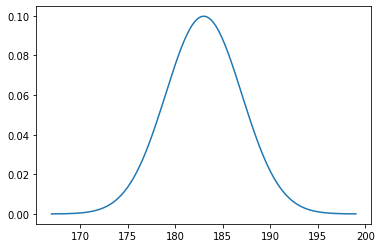

In [52]:
import math
m=183 #mean gemiddelden

n=81 #random sample
s=36 #standaard afwijking populatie?
s=s/math.sqrt(n) #standaard afwijking van populatie naar steekproef?

#1
#x 
dist_x = np.linspace(m-4*s,m+4*s,num=201)
#y
dist_y = stats.norm.pdf(dist_x, loc=m, scale=s)
#plot pdf
plt.plot(dist_x, dist_y)

#2
x=185
l185 = stats.norm.cdf(x, loc=m, scale=s)
print("2. %.3f" %l185)

#3
x=175
l175 = l185-stats.norm.cdf(x, loc=m, scale=s)
print("3. %.3f" %l175)

#4
x=190
r190 = stats.norm.sf(x, loc=m, scale=s)
print("4. %.3f" %r190)


### Exercise 6
A random sample of 64 is drawn from a population with unknown distribution. However, the expectation and standard deviation of the population are known: $\mu = 20$ and $\sigma = 16$.

1. Plot the probability distribution of the sample mean.
2. Calculate the z-score for $\overline{x_1} = 15.5$  
3. Calculate the z-score for $\overline{x_2} = 23$ 
4. Determine the probability that 16 < $\overline{x}$ < 22 (Answer ≈ 81.9%)


2: -2.250
3: 1.500
4: 0.819


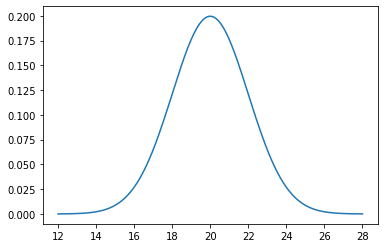

In [59]:
n=64 #steekproefgrootte
m = 20 #gemiddelde (verwacht)
s = 16/math.sqrt(n) #standaardafwijking voor de steekproef?

def cdf(x,m, s):
  return stats.norm.cdf(x, loc=m, scale=s)

def z(x, m, s):
  return (x-m)/s


#1
dist_x=np.linspace(m-4*s,m+4*s, num=201)
dist_y=stats.norm.pdf(dist_x, m, s)
plt.plot(dist_x, dist_y)


#2
print("2: %.3f"%z(15.5, m, s))

#3
print("3: %.3f"%z(23, m,s))

#4
print("4: %.3f" % (cdf(22,m,s)-cdf(16,m,s)))

## Confidence Intervals

## Exercise 7 - rlanders
Load the dataset data/rlanders.csv. Use the column Money.  
We assume that the values from this sample are normally distributed around a population mean $\mu$ that is unknown, but that the standard deviation of the population is known, i.e. $\sigma = 98$.


In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/rlanders.csv').set_index(['ID'])
# Show the first few records of the Data Frame
df.head()



Gender  Money  Days  Months  Count  Survey
ID                                            
1   Female    440    29      11     35       3
2   Female    503    23      10     52       3
3     Male    412    16      11     55       3
4     Male    587    25       9     28       5
5     Male    525    30      11     41       4

In [94]:
sPop = 98
n= df["Money"].count()
s = 98/math.sqrt(n)
m = df["Money"].mean()

Calculate a 99% confidence interval for the population mean (Answer: [484.191, 516.121]).

In [98]:
def confIntervalLarge(confidenceLevel, meanSample, standaardDivSample):
  alpha = 1-confidenceLevel
  p = 1-alpha/2
  zAlpha2Kans = stats.norm.isf(1-p)
  return [meanSample-zAlpha2Kans*(standaardDivSample),meanSample+zAlpha2Kans*(standaardDivSample)]
  
confIntervalLarge(0.99, m, s)


[484.1908445724813, 516.1211554275187]

Calculate a 95% confidence interval for the population mean. (Answer =  [488.008, 512.304])

In [99]:
confIntervalLarge(0.95, m, s)

[488.0080173668306, 512.3039826331694]

Suppose σ is unknown, calculate a 95% confidence interval for the population mean. (Answer = [487.319, 512.993])

In [109]:
def confIntervalSmall(confidenceLevel, meanSample, standaardDivSample, sampleSize):
  alpha = 1-confidenceLevel
  p = 1-alpha/2
  zAlpha2Kans = stats.t.isf(1-p, df=(sampleSize-1))
  return [meanSample-zAlpha2Kans*(standaardDivSample/math.sqrt(sampleSize)),meanSample+zAlpha2Kans*(standaardDivSample/math.sqrt(sampleSize))]

confIntervalSmall(0.95,m,df["Money"].std(), n)


[487.3189233748625, 512.9930766251375]

Finally, suppose the sample consists of only the first 25 observations in this dataset. Calculate a 95% confidence interval for this situation.  
(Answer = [450.291,536.669])

In [117]:
confIntervalSmall(0.95, df.iloc[0:25]["Money"].mean(),df.iloc[0:25]["Money"].std(), df.iloc[0:25]["Money"].count() )


[450.29120764817304, 536.6687923518269]